In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [19]:
# Bước 1: Đọc dữ liệu
data = pd.read_csv('D:/DTA/winequality-red.csv')
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])
data_scaled = pd.DataFrame(data_scaled, columns=features)

print(data_scaled.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol  
0 -0.960246  
1 -0.584777  
2 -0.584777  


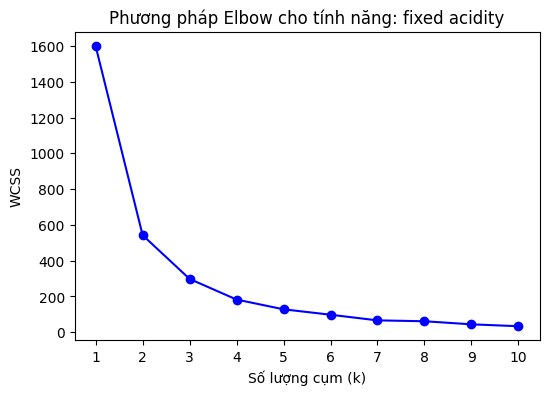

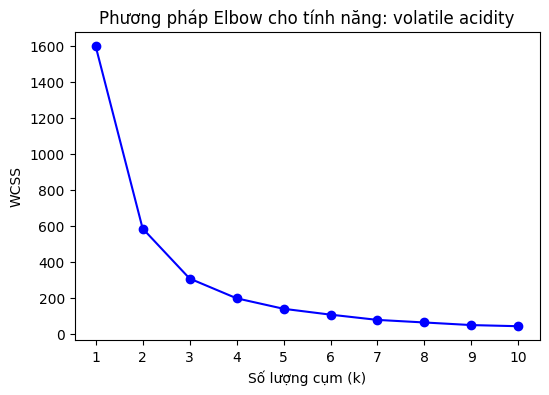

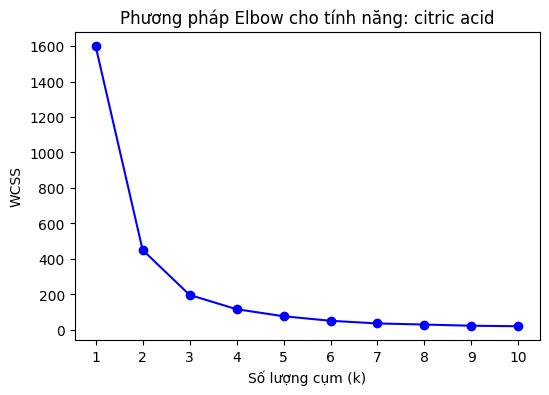

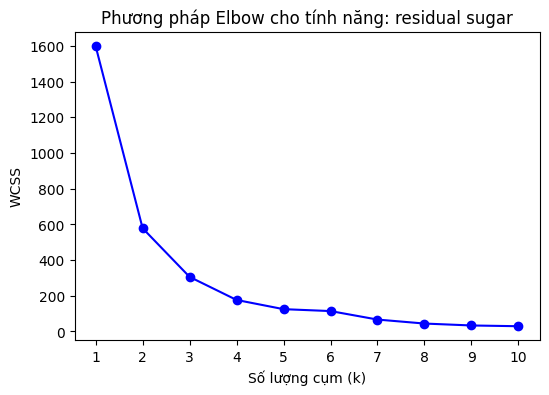

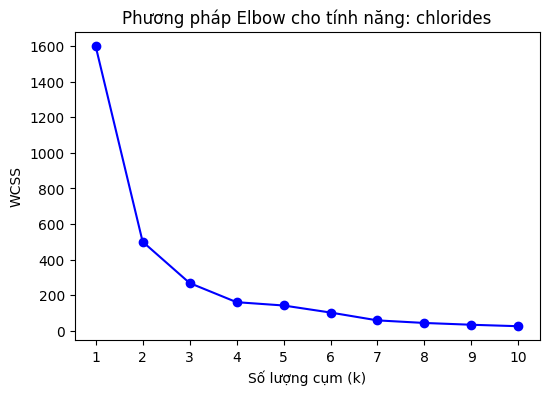

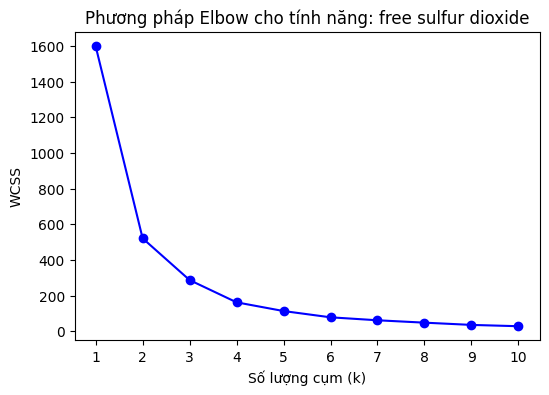

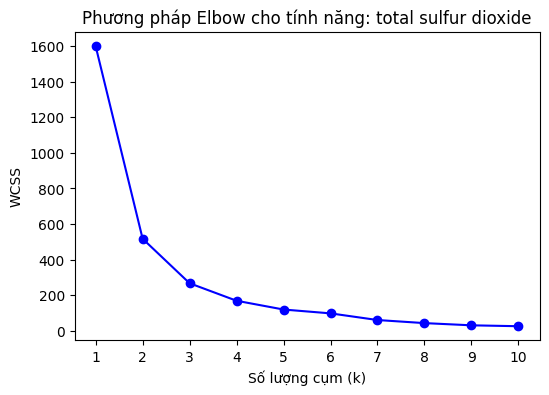

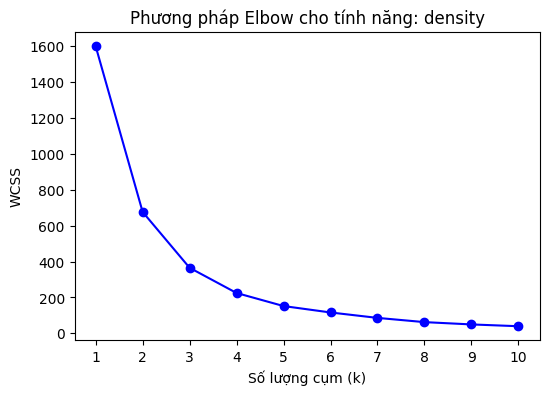

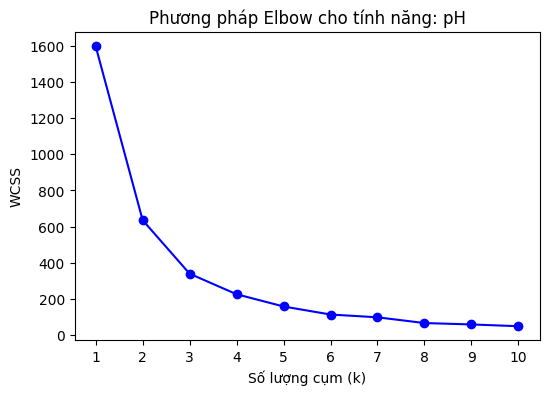

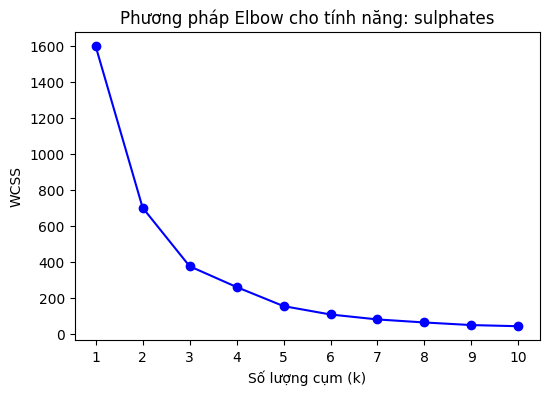

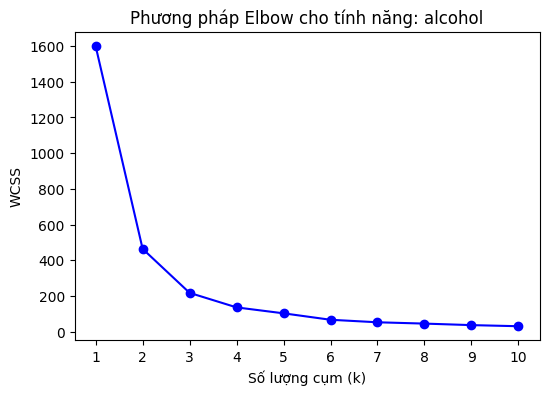


Số lượng cụm tối ưu cho từng tính năng:
fixed acidity: 3
volatile acidity: 3
citric acid: 3
residual sugar: 3
chlorides: 3
free sulfur dioxide: 3
total sulfur dioxide: 3
density: 3
pH: 3
sulphates: 3
alcohol: 3


In [20]:
# Bước 2: Tính toán và Vẽ Đồ Thị Elbow để xác định số cụm tối ưu
optimal_clusters = {}

for feature in features:
    X = data_scaled[[feature]].values
    wcss = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    # Vẽ đồ thị Elbow
    plt.figure(figsize=(6,4))
    plt.plot(K, wcss, 'bo-')
    plt.xlabel('Số lượng cụm (k)')
    plt.ylabel('WCSS')
    plt.title(f'Phương pháp Elbow cho tính năng: {feature}')
    plt.xticks(K)
    plt.show()
    
    # Yêu cầu người dùng nhập số cụm tối ưu
    while True:
        try:
            optimal_k = int(input(f'Nhập số lượng cụm tối ưu cho tính năng "{feature}": '))
            if 1 <= optimal_k <= 10:
                break
            else:
                print("Vui lòng nhập số cụm từ 1 đến 10.")
        except ValueError:
            print("Vui lòng nhập một số nguyên hợp lệ.")
    
    optimal_clusters[feature] = optimal_k

print("\nSố lượng cụm tối ưu cho từng tính năng:")
for feature, k in optimal_clusters.items():
    print(f"{feature}: {k}")

In [28]:
# Bước 3: Phân cụm và tạo mô tả cụm
cluster_descriptions = {}

for feature in features:
    k = optimal_clusters[feature]
    X = data[[feature]].values
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    data[f'{feature}_cluster'] = cluster_labels
    
    # Lấy các trung tâm cụm và sắp xếp chúng
    centers = sorted(kmeans.cluster_centers_.flatten())
    
    # Tạo mô tả dựa trên thứ tự của trung tâm cụm
    if k == 2:
        descriptions = ['Thấp', 'Cao']
    elif k == 3:
        descriptions = ['Thấp', 'Trung Bình', 'Cao']
    elif k == 4:
        descriptions = ['Rất thấp', 'Thấp', 'Cao', 'Rất cao']
    elif k == 5:
        descriptions = ['Rất thấp', 'Thấp', 'Trung Bình', 'Cao', 'Rất cao']
    else:
        descriptions = [f'Cluster {i}' for i in range(k)]
    
    # Sắp xếp mô tả theo thứ tự giá trị trung tâm cụm
    cluster_descriptions[feature] = {}
    for idx, center in enumerate(centers):
        cluster_label = kmeans.predict([[center]])[0]
        cluster_descriptions[feature][cluster_label] = descriptions[idx]
        
print("\nMô tả cụm cho từng tính năng:")
for feature, desc in cluster_descriptions.items():
    print(f"{feature}: {desc}")


Mô tả cụm cho từng tính năng:
fixed acidity: {1: 'Thấp', 0: 'Trung Bình', 2: 'Cao'}
volatile acidity: {1: 'Thấp', 0: 'Trung Bình', 2: 'Cao'}
citric acid: {2: 'Thấp', 0: 'Trung Bình', 1: 'Cao'}
residual sugar: {0: 'Thấp', 2: 'Trung Bình', 1: 'Cao'}
chlorides: {0: 'Thấp', 2: 'Trung Bình', 1: 'Cao'}
free sulfur dioxide: {0: 'Thấp', 2: 'Trung Bình', 1: 'Cao'}
total sulfur dioxide: {0: 'Thấp', 2: 'Trung Bình', 1: 'Cao'}
density: {1: 'Thấp', 0: 'Trung Bình', 2: 'Cao'}
pH: {2: 'Thấp', 0: 'Trung Bình', 1: 'Cao'}
sulphates: {0: 'Thấp', 1: 'Trung Bình', 2: 'Cao'}
alcohol: {0: 'Thấp', 1: 'Trung Bình', 2: 'Cao'}


In [29]:
# Bước 2: Chuẩn bị dữ liệu cho Apriori
cluster_features = [f'{feature}_cluster' for feature in features]
clusters_df = data[cluster_features].copy()

print(format(clusters_df))

      fixed acidity_cluster  volatile acidity_cluster  citric acid_cluster  \
0                         1                         0                    2   
1                         0                         2                    2   
2                         0                         2                    2   
3                         2                         1                    1   
4                         1                         0                    2   
...                     ...                       ...                  ...   
1594                      1                         0                    2   
1595                      1                         0                    2   
1596                      1                         0                    2   
1597                      1                         0                    2   
1598                      1                         1                    1   

      residual sugar_cluster  chlorides_cluster  free sulfur di

In [30]:
# Chuyển đổi các giá trị cụm thành chuỗi và thêm tiền tố cho mỗi giá trị để tránh trùng lặp
for feature in cluster_features:
    clusters_df[feature] = clusters_df[feature].astype(str)
    clusters_df[feature] = feature + "_" + clusters_df[feature]

# Chuyển đổi DataFrame thành danh sách các giao dịch
transactions = clusters_df.apply(lambda row: row.tolist(), axis=1).tolist()

# Mã hóa dữ liệu cho Apriori
encoder = TransactionEncoder()
encoded_array = encoder.fit(transactions).transform(transactions)
encoded_df = pd.DataFrame(encoded_array, columns=encoder.columns_)

print(encoded_df.head())

   alcohol_cluster_0  alcohol_cluster_1  alcohol_cluster_2  \
0               True              False              False   
1               True              False              False   
2               True              False              False   
3               True              False              False   
4               True              False              False   

   chlorides_cluster_0  chlorides_cluster_1  chlorides_cluster_2  \
0                 True                False                False   
1                 True                False                False   
2                 True                False                False   
3                 True                False                False   
4                 True                False                False   

   citric acid_cluster_0  citric acid_cluster_1  citric acid_cluster_2  \
0                  False                  False                   True   
1                  False                  False                   True

In [31]:
# Áp dụng Apriori
min_support = 0.3
frequent_itemsets = apriori(encoded_df, min_support=min_support, use_colnames=True)

# Tìm luật kết hợp
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules.sort_values(by='lift', ascending=False)

print(rules.head())

                                           antecedents  \
176  (free sulfur dioxide_cluster_0, chlorides_clus...   
89                    (total sulfur dioxide_cluster_0)   
88   (free sulfur dioxide_cluster_0, chlorides_clus...   
130                   (total sulfur dioxide_cluster_0)   
129  (free sulfur dioxide_cluster_0, residual sugar...   

                                           consequents  antecedent support  \
176                   (total sulfur dioxide_cluster_0)            0.345216   
89   (free sulfur dioxide_cluster_0, chlorides_clus...            0.525954   
88                    (total sulfur dioxide_cluster_0)            0.392120   
130  (free sulfur dioxide_cluster_0, residual sugar...            0.525954   
129                   (total sulfur dioxide_cluster_0)            0.367730   

     consequent support   support  confidence      lift  leverage  conviction  \
176            0.525954  0.307067    0.889493  1.691200  0.125499    4.289730   
89             0.392

In [32]:
# Áp dụng mapping vào các luật kết hợp
def map_cluster_label(item, cluster_descriptions):
    feature, cluster = item.split('_cluster_')
    cluster = int(cluster)
    description = cluster_descriptions.get(feature, {}).get(cluster, f'Cluster {cluster}')
    return f"{feature}: {description}"

def map_itemset(itemset, cluster_descriptions):
    return ', '.join([map_cluster_label(item, cluster_descriptions) for item in itemset])

rules_mapped = rules.copy()
rules_mapped['antecedents'] = rules_mapped['antecedents'].apply(lambda x: map_itemset(x, cluster_descriptions))
rules_mapped['consequents'] = rules_mapped['consequents'].apply(lambda x: map_itemset(x, cluster_descriptions))

print(rules_mapped.head())

                                           antecedents  \
176  free sulfur dioxide: Thấp, chlorides: Thấp, re...   
89                          total sulfur dioxide: Thấp   
88          free sulfur dioxide: Thấp, chlorides: Thấp   
130                         total sulfur dioxide: Thấp   
129    free sulfur dioxide: Thấp, residual sugar: Thấp   

                                         consequents  antecedent support  \
176                       total sulfur dioxide: Thấp            0.345216   
89        free sulfur dioxide: Thấp, chlorides: Thấp            0.525954   
88                        total sulfur dioxide: Thấp            0.392120   
130  free sulfur dioxide: Thấp, residual sugar: Thấp            0.525954   
129                       total sulfur dioxide: Thấp            0.367730   

     consequent support   support  confidence      lift  leverage  conviction  \
176            0.525954  0.307067    0.889493  1.691200  0.125499    4.289730   
89             0.392120  0.34646

In [33]:
# Lấy top 10 luật có giá trị nhất
top_10_rules = rules_mapped.head(10)

# Hiển thị các luật kết hợp đã được chuyển đổi
print("Top 10 luật kết hợp với mô tả dễ hiểu:")
for index, row in top_10_rules.iterrows():
    antecedents = row['antecedents']
    consequents = row['consequents']
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']
    print(f"Luật: Nếu {antecedents} thì {consequents} (Support: {support:.2f}, Confidence: {confidence:.2f}, Lift: {lift:.2f})")

Top 10 luật kết hợp với mô tả dễ hiểu:
Luật: Nếu free sulfur dioxide: Thấp, chlorides: Thấp, residual sugar: Thấp thì total sulfur dioxide: Thấp (Support: 0.31, Confidence: 0.89, Lift: 1.69)
Luật: Nếu total sulfur dioxide: Thấp thì free sulfur dioxide: Thấp, chlorides: Thấp (Support: 0.35, Confidence: 0.66, Lift: 1.68)
Luật: Nếu free sulfur dioxide: Thấp, chlorides: Thấp thì total sulfur dioxide: Thấp (Support: 0.35, Confidence: 0.88, Lift: 1.68)
Luật: Nếu total sulfur dioxide: Thấp thì free sulfur dioxide: Thấp, residual sugar: Thấp (Support: 0.32, Confidence: 0.62, Lift: 1.67)
Luật: Nếu free sulfur dioxide: Thấp, residual sugar: Thấp thì total sulfur dioxide: Thấp (Support: 0.32, Confidence: 0.88, Lift: 1.67)
Luật: Nếu free sulfur dioxide: Thấp thì total sulfur dioxide: Thấp (Support: 0.36, Confidence: 0.88, Lift: 1.67)
Luật: Nếu total sulfur dioxide: Thấp thì free sulfur dioxide: Thấp (Support: 0.36, Confidence: 0.69, Lift: 1.67)
Luật: Nếu total sulfur dioxide: Thấp, chlorides: Thấp

In [34]:
# lưu các luật kết hợp có giá trị lớn hơn 1.15 vào file csv
top_rules = rules_mapped[rules_mapped['lift'] > 1.15]
top_rules.to_csv('D:/DTA/top_rules.csv', index=False)
print("\nCác luật kết hợp có giá trị Lift lớn hơn 1.15 đã được lưu vào file 'top_rules.csv'.")


Các luật kết hợp có giá trị Lift lớn hơn 1.5 đã được lưu vào file 'top_rules.csv'.
